In [20]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import scipy.stats as stats
%matplotlib inline
%config InlineBackend.figure_format='retina'



In [4]:
ds = xr.open_dataset("ERA5_CF_202001.nc")
ds.info()

xarray.Dataset {
dimensions:
	latitude = 201 ;
	longitude = 445 ;
	time = 744 ;

variables:
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 solarCF(time, latitude, longitude) ;
		solarCF:units =   ;
		solarCF:short_name = solarCF ;
		solarCF:long_name = Capacity factor for photovoltaics ;
		solarCF:method = Based on Jerez et al., 2015 ;
		solarCF:description = Hourly capacity factor of solar panels ;
	float32 windCF_off(time, latitude, longitude) ;
		windCF_off:units =   ;
		windCF_off:short_name = windCF_off ;
		windCF_off:long_name = Capacity factor for wind offshore with hubheigh 150 meter ;
		windCF_off:method = Adopted by L.P. Stoop, based on Jerez et al., 2015 ;
		windCF_off:description = Hourly capacity factor of offshore wind turbines ;
	float32 windCF_on(time, la

In [5]:
latitudes = ds['latitude'].values
longitudes = ds['longitude'].values
print("Possible (lat, lon) combinations:")
for lat in latitudes:
    for lon in longitudes:
        print(f"({lat}, {lon})")

Possible (lat, lon) combinations:
(80.0, -31.0)
(80.0, -30.75)
(80.0, -30.5)
(80.0, -30.25)
(80.0, -30.0)
(80.0, -29.75)
(80.0, -29.5)
(80.0, -29.25)
(80.0, -29.0)
(80.0, -28.75)
(80.0, -28.5)
(80.0, -28.25)
(80.0, -28.0)
(80.0, -27.75)
(80.0, -27.5)
(80.0, -27.25)
(80.0, -27.0)
(80.0, -26.75)
(80.0, -26.5)
(80.0, -26.25)
(80.0, -26.0)
(80.0, -25.75)
(80.0, -25.5)
(80.0, -25.25)
(80.0, -25.0)
(80.0, -24.75)
(80.0, -24.5)
(80.0, -24.25)
(80.0, -24.0)
(80.0, -23.75)
(80.0, -23.5)
(80.0, -23.25)
(80.0, -23.0)
(80.0, -22.75)
(80.0, -22.5)
(80.0, -22.25)
(80.0, -22.0)
(80.0, -21.75)
(80.0, -21.5)
(80.0, -21.25)
(80.0, -21.0)
(80.0, -20.75)
(80.0, -20.5)
(80.0, -20.25)
(80.0, -20.0)
(80.0, -19.75)
(80.0, -19.5)
(80.0, -19.25)
(80.0, -19.0)
(80.0, -18.75)
(80.0, -18.5)
(80.0, -18.25)
(80.0, -18.0)
(80.0, -17.75)
(80.0, -17.5)
(80.0, -17.25)
(80.0, -17.0)
(80.0, -16.75)
(80.0, -16.5)
(80.0, -16.25)
(80.0, -16.0)
(80.0, -15.75)
(80.0, -15.5)
(80.0, -15.25)
(80.0, -15.0)
(80.0, -14.75)
(80.0, -1

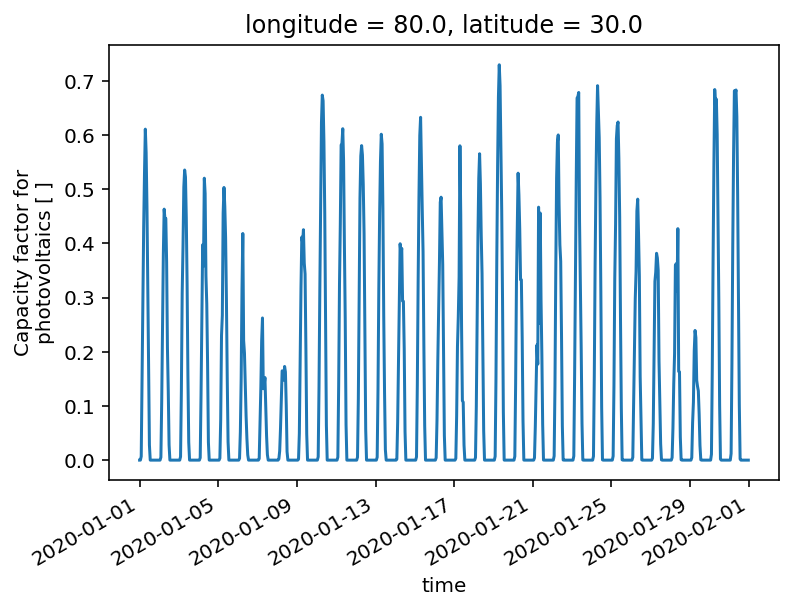

In [11]:
lat = 30.0
lon = 80.0
solar_cf = ds['solarCF'].sel(latitude=lat, longitude=lon)

# Plot solarCF against time
solar_cf.plot()



Interpolated to nearest coordinate for solar_cf1: (30.25, 80.0)
Interpolated to nearest coordinate for solar_cf2: (50.0, -30.75)
Pearson's corr. coeff= -0.33093400472691137
pvalue= 1.7917591520660058e-20


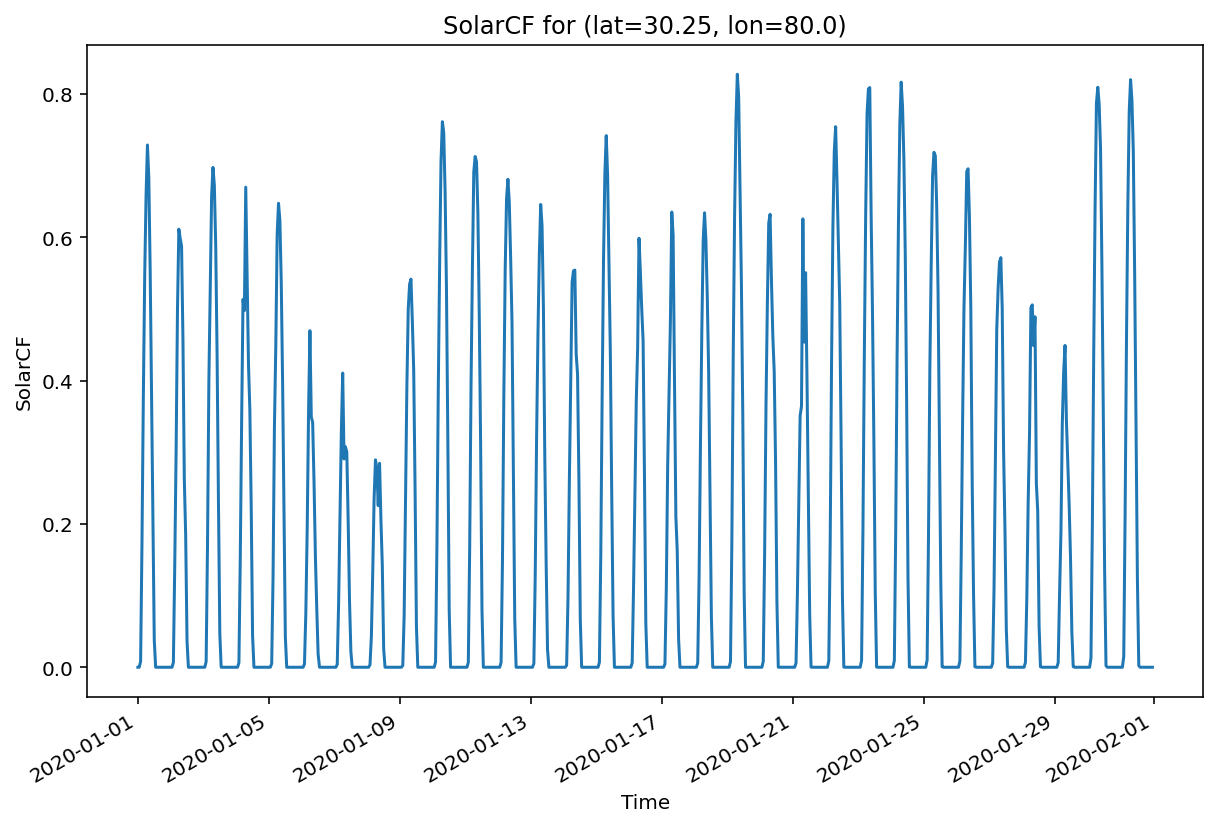

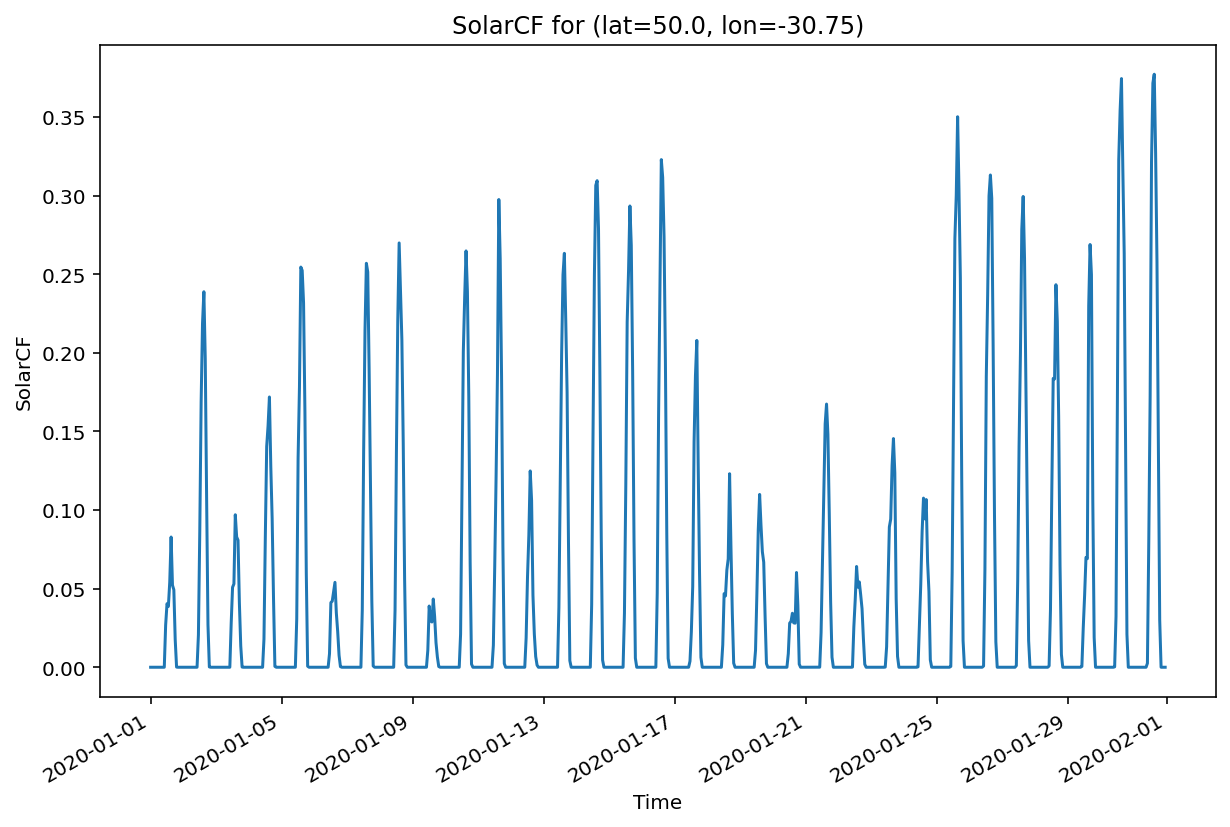

In [38]:
lat1, lon1 = 30.3, 80.1
lat2, lon2 = 50.0, -30.74
solar_cf1 = ds['solarCF'].sel(latitude=lat1, longitude=lon1,method='nearest')
solar_cf2 = ds['solarCF'].sel(latitude=lat2, longitude=lon2,method='nearest')
solar_cf1 = ds['solarCF'].sel(latitude=lat1, longitude=lon1, method='nearest')

#Replace lat and lon with actual (lat,lon) pairs present in the data after the 'nearest' method is used
actual_lat1 = ds['latitude'].sel(latitude=solar_cf1.latitude.values, method='nearest').values
actual_lon1 = ds['longitude'].sel(longitude=solar_cf1.longitude.values, method='nearest').values
print(f"Interpolated to nearest coordinate for solar_cf1: ({actual_lat1}, {actual_lon1})")
lat1, lon1 = actual_lat1, actual_lon1

solar_cf2 = ds['solarCF'].sel(latitude=lat2, longitude=lon2, method='nearest')
actual_lat2 = ds['latitude'].sel(latitude=solar_cf2.latitude.values, method='nearest').values
actual_lon2 = ds['longitude'].sel(longitude=solar_cf2.longitude.values, method='nearest').values
print(f"Interpolated to nearest coordinate for solar_cf2: ({actual_lat2}, {actual_lon2})")
lat2, lon2 = actual_lat2, actual_lon2

#Plot both time series separately
fig1, ax1 = plt.subplots(figsize=(10, 6))
solar_cf1.plot(ax=ax1)
ax1.set_title(f'SolarCF for (lat={lat1}, lon={lon1})')
ax1.set_xlabel('Time')
ax1.set_ylabel('SolarCF')

fig2, ax2 = plt.subplots(figsize=(10, 6))
solar_cf2.plot(ax=ax2)
ax2.set_title(f'SolarCF for (lat={lat2}, lon={lon2})')
ax2.set_xlabel('Time')
ax2.set_ylabel('SolarCF')


#find pearson's corr.
corr_coeff, p_value = stats.pearsonr(solar_cf1, solar_cf2)
print(f"Pearson's corr. coeff= {corr_coeff}")
print(f"pvalue= {p_value}")



In [40]:
print((solar_cf1))

<xarray.DataArray 'solarCF' (time: 744)>
array([0.      , 0.      , 0.008156, ..., 0.      , 0.      , 0.      ],
      dtype=float32)
Coordinates:
    longitude  float32 80.0
    latitude   float32 30.25
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
Attributes:
    units:         
    short_name:   solarCF
    long_name:    Capacity factor for photovoltaics
    method:       Based on Jerez et al., 2015
    description:  Hourly capacity factor of solar panels
